<a href="https://colab.research.google.com/github/prof-nuduls/EE628HW/blob/main/EE628_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 7s 26ms/step - loss: 0.2778 - val_loss: 0.1918
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1712 - val_loss: 0.1528
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1437 - val_loss: 0.1333
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1285 - val_loss: 0.1215
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1188 - val_loss: 0.1135
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1121 - val_loss: 0.1079
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1073 - val_loss: 0.1039
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1036 - val_loss: 0.1007
Epoch 9/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1006 - val_loss: 0.0980
Epoch 10/20
235/235 [==============================] - 2s 10ms/st

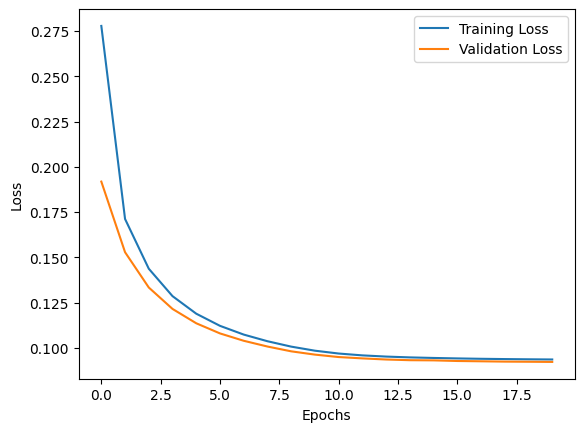

In [ ]:
from keras.layers import Input, Dense
import matplotlib.pyplot as plt
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
x_test[0].shape


(784,)

313/313 [==============================] - 1s 2ms/step


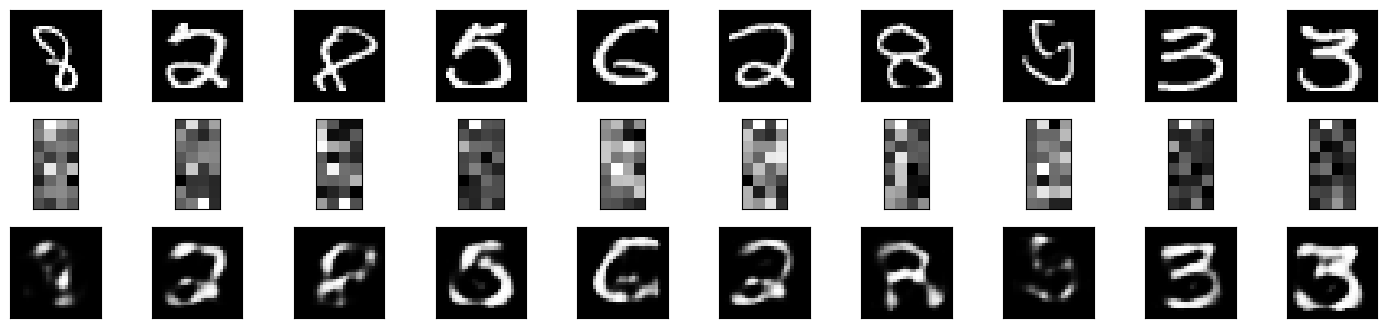

[0.04516705, 0.042873744, 0.04084877, 0.040550735, 0.03759845, 0.037348673, 0.036683507, 0.03500086, 0.034365032, 0.033209886]


In [ ]:
indicies = [0,0,0,0,0,0,0,0,0,0]
error =  [0,0,0,0,0,0,0,0,0,0]
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
for i in range (x_test.shape[0]):
  mse = np.mean((x_test[i]-decoded_imgs[i])**2)
  for j in range(10):
    if mse > error[j]:
      error[j] = mse
      indicies[j] = i
      break

plt.figure(figsize=(18, 4))
num_images = 10
for i in range(10):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[indicies[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[indicies[i]].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[indicies[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print(error)

In [552]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
scaler = MinMaxScaler()
df = pd.read_csv("data1.csv")
print(df.shape)
df

(284807, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [553]:
first_28 = df.iloc[:,0:28]
first_28 =(first_28- first_28.mean()) / first_28.std()
#first_28 = scaler.fit_transform(first_28)
#first_28 = first_28/first_28.max()
print(first_28.shape)
first_28

(284807, 28)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,0.083385,...,0.496281,0.326117,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781
1,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153349,...,-0.179086,-0.089611,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607
2,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,0.190699,...,-2.778556,0.680974,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021
3,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,-0.050468,...,-1.514202,-0.269855,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188
4,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,0.691624,...,0.987036,0.529938,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065831,6.099275,-6.486233,-1.459638,-3.886604,-1.956687,-3.975621,6.116562,1.742556,4.000708,...,-0.838926,1.914361,0.290602,0.154146,1.624571,-0.840999,2.756316,0.518499,2.337897,2.495525
284803,-0.374121,-0.033356,1.342142,-0.521651,0.629039,0.794444,0.019667,0.246886,0.532298,-0.896291,...,-1.898623,0.077330,0.291625,1.273779,0.019958,-1.677917,-1.163724,-0.819645,0.169641,-0.162163
284804,0.980022,-0.182433,-2.143201,-0.393983,1.905830,2.275258,-0.239939,0.593139,0.393630,-0.445224,...,-0.709119,0.001811,0.315912,0.796786,-0.060053,1.056942,0.509796,-0.181181,0.011037,-0.080467
284805,-0.122755,0.321250,0.463319,0.487192,-0.273836,0.468154,-0.554671,0.568630,0.356886,-0.366557,...,3.559834,0.165299,0.361111,1.102449,-0.261503,0.203427,-1.091853,1.133633,0.269604,0.316686


In [554]:
class_1 = df.index[df['Class']== 1].tolist()
class_0 = df.index[df['Class']== 0].tolist()
print(len(class_1))
print(len(class_0))

492
284315


In [555]:
from keras.layers import Input, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np


In [556]:
x_train,x_test,_,_ = train_test_split(first_28,first_28,test_size=0.3,stratify=df['Class'])


In [557]:
x_test.shape

(85443, 28)

Epoch 1/20
390/390 [==============================] - 2s 3ms/step - loss: 0.9952 - val_loss: 0.9458
Epoch 2/20
390/390 [==============================] - 1s 3ms/step - loss: 0.9446 - val_loss: 0.9310
Epoch 3/20
390/390 [==============================] - 1s 2ms/step - loss: 0.9362 - val_loss: 0.9244
Epoch 4/20
390/390 [==============================] - 1s 3ms/step - loss: 0.9279 - val_loss: 0.9137
Epoch 5/20
390/390 [==============================] - 1s 4ms/step - loss: 0.9173 - val_loss: 0.9049
Epoch 6/20
390/390 [==============================] - 2s 4ms/step - loss: 0.9107 - val_loss: 0.9010
Epoch 7/20
390/390 [==============================] - 1s 3ms/step - loss: 0.9084 - val_loss: 0.8994
Epoch 8/20
390/390 [==============================] - 1s 3ms/step - loss: 0.9070 - val_loss: 0.8977
Epoch 9/20
390/390 [==============================] - 1s 2ms/step - loss: 0.9037 - val_loss: 0.8924
Epoch 10/20
390/390 [==============================] - 1s 2ms/step - loss: 0.8981 - val_loss: 0.8877

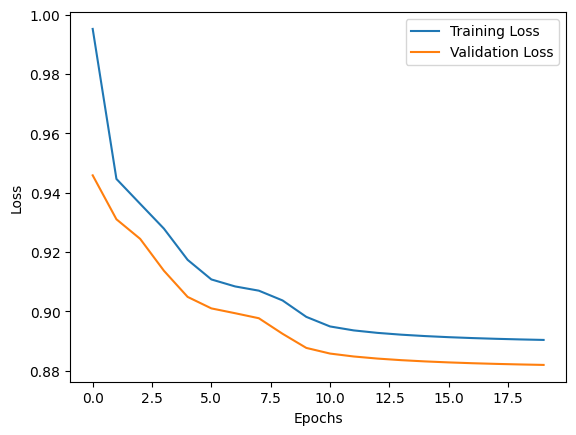

In [558]:

# this is the size of our encoded representations
encoding_dim = 2
val = first_28.shape[1]
# this is our input placeholder
input_img = Input(shape=(val,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(val, activation='tanh')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='mse')



history = autoencoder.fit(x_train,x_train,
                epochs=20,
                batch_size=512,
                shuffle=False,
                validation_data=(x_test, x_test))
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [559]:
encoded_imgs = encoder.predict(first_28)
decoded_imgs = decoder.predict(encoded_imgs)

error = ((first_28 - decoded_imgs)**2).mean(axis=1)
error.shape

8901/8901 [==============================] - 12s 1ms/step


(284807,)

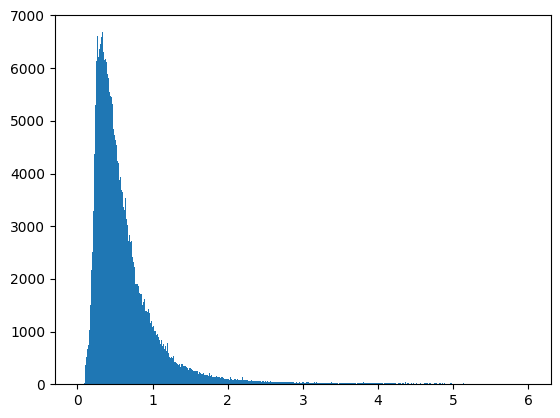

In [560]:
plt.hist(error,bins='auto',range=(0,6))
plt.show()

In [561]:
encoded_item = encoder.predict(first_28)

8901/8901 [==============================] - 13s 1ms/step


In [562]:
encoded_item

array([[0.3086363 , 0.22879362],
       [0.21915364, 0.4401561 ],
       [1.2767822 , 8.598789  ],
       ...,
       [0.44573808, 0.49661314],
       [0.39433992, 0.5900651 ],
       [0.6977757 , 0.1912148 ]], dtype=float32)

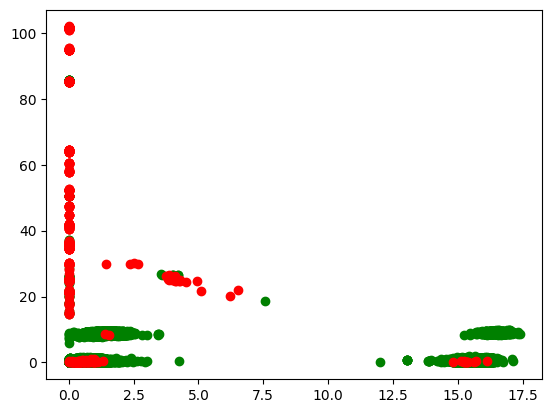

In [563]:

x0 = encoded_item[class_0,0]
y0 = encoded_item[class_0,1]
x1 = encoded_item[class_1,0]
y1 = encoded_item[class_1,1]

plt.plot(x0,y0,'go')
plt.plot(x1,y1,'ro')

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_354 (Dense)           (None, 16)                464       
                                                                 
 dense_355 (Dense)           (None, 8)                 136       
                                                                 
 dense_356 (Dense)           (None, 2)                 18        
                                                                 
 dense_357 (Dense)           (None, 8)                 24        
                                                                 
 dense_358 (Dense)           (None, 16)                144       
                                                                 
 dense_359 (Dense)           (None, 28)                476       
                                                                 
Total params: 1262 (4.93 KB)
Trainable params: 1262 (

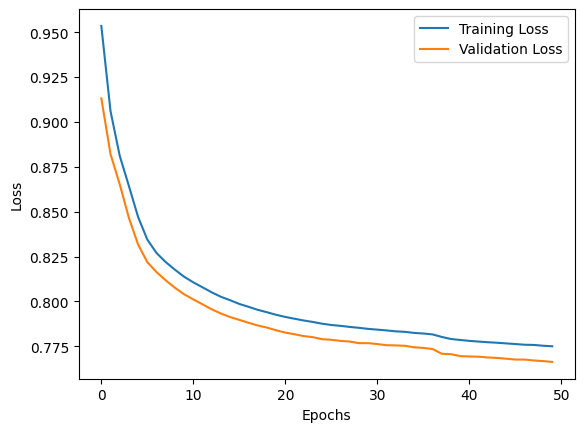

In [564]:

# this is the size of our encoded representations
encoding_dim = 2 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
val = first_28.shape[1]
# this is our input placeholder
input_img = Input(shape=(val,))
autoencoder = Sequential()
input_dim = val
# Encoder Layers
autoencoder.add(Dense(8 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense( encoding_dim, activation='relu'))
# Decoder Layers
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(8 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='tanh'))

autoencoder.summary()
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoded_input = Input(shape=(encoding_dim,))
decoder_layer1=autoencoder.layers[-3]
decoder_layer2=autoencoder.layers[-2]
decoder_layer3=autoencoder.layers[-1]
decoder=Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))
decoder.summary()

encoder.summary()


autoencoder.compile(optimizer='adam', loss='mse')



history = autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=512,
                shuffle=False,
                validation_data=(x_test, x_test))
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [565]:
encoded_imgs = encoder.predict(first_28)
decoded_imgs = decoder.predict(encoded_imgs)

error = ((first_28 - decoded_imgs)**2).mean(axis=1)
error.shape

8901/8901 [==============================] - 13s 1ms/step


(284807,)

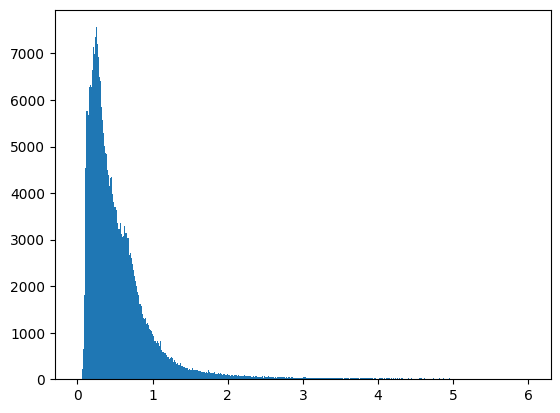

In [566]:
plt.hist(error,bins='auto',range=(0,6))
plt.show()

In [567]:
encoded_item = encoder.predict(first_28)
encoded_item.shape

8901/8901 [==============================] - 15s 2ms/step


(284807, 2)

In [568]:
encoded_item

array([[4.3139486, 1.3238912],
       [3.4143162, 3.4968874],
       [4.3519845, 2.0752165],
       ...,
       [6.2524037, 6.4480796],
       [7.8684225, 1.929908 ],
       [4.284292 , 2.6848538]], dtype=float32)

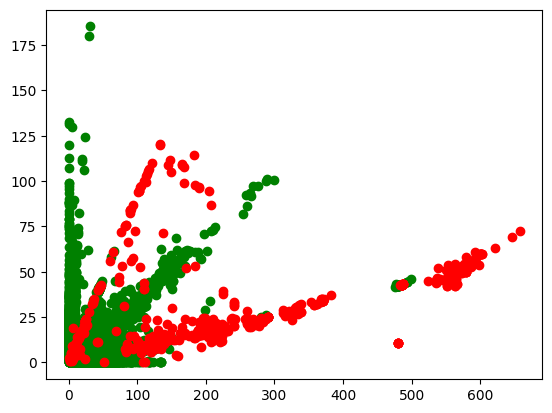

In [569]:
x0 = encoded_item[class_0,0]
y0 = encoded_item[class_0,1]
x1 = encoded_item[class_1,0]
y1 = encoded_item[class_1,1]

plt.plot(x0,y0,'go')
plt.plot(x1,y1,'ro')

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_203 (InputLayer)      [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 14, 14, 32)           320       ['input_203[0][0]']           
                                                                                                  
 conv2d_5 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d_4[0][0]']            
                                                                                                  
 flatten_2 (Flatten)         (None, 3136)                 0         ['conv2d_5[0][0]']            
                                                                                            

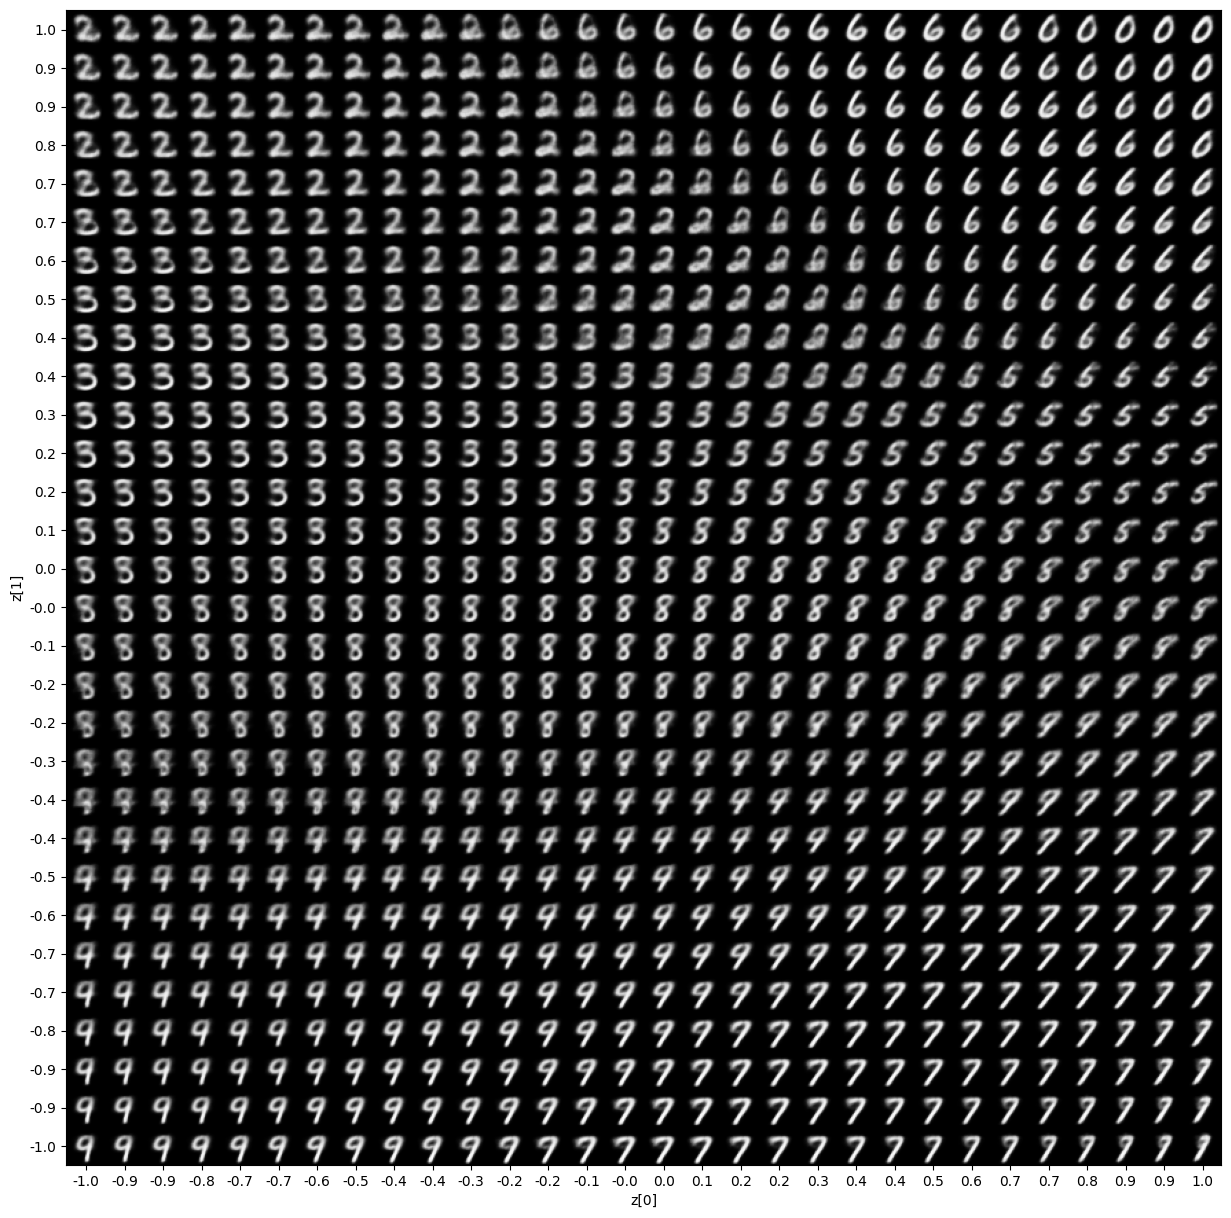

1875/1875 [==============================] - 10s 5ms/step


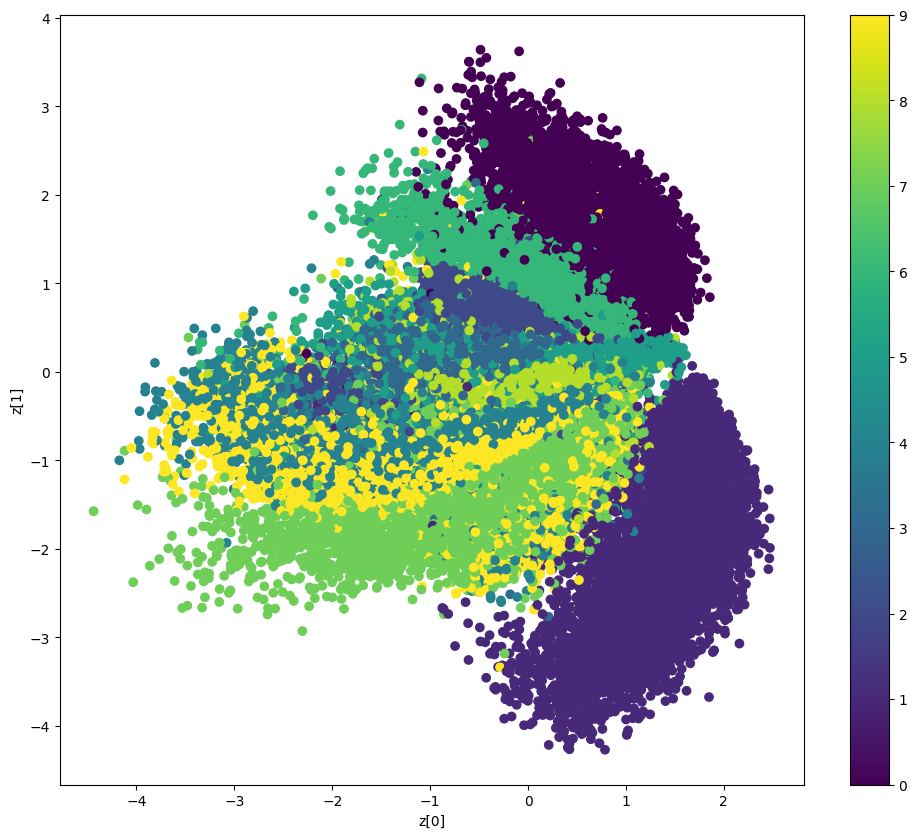

In [530]:
"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_205 (InputLayer)      [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 14, 14, 32)           320       ['input_205[0][0]']           
                                                                                                  
 conv2d_7 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d_6[0][0]']            
                                                                                                  
 flatten_3 (Flatten)         (None, 3136)                 0         ['conv2d_7[0][0]']            
                                                                                            

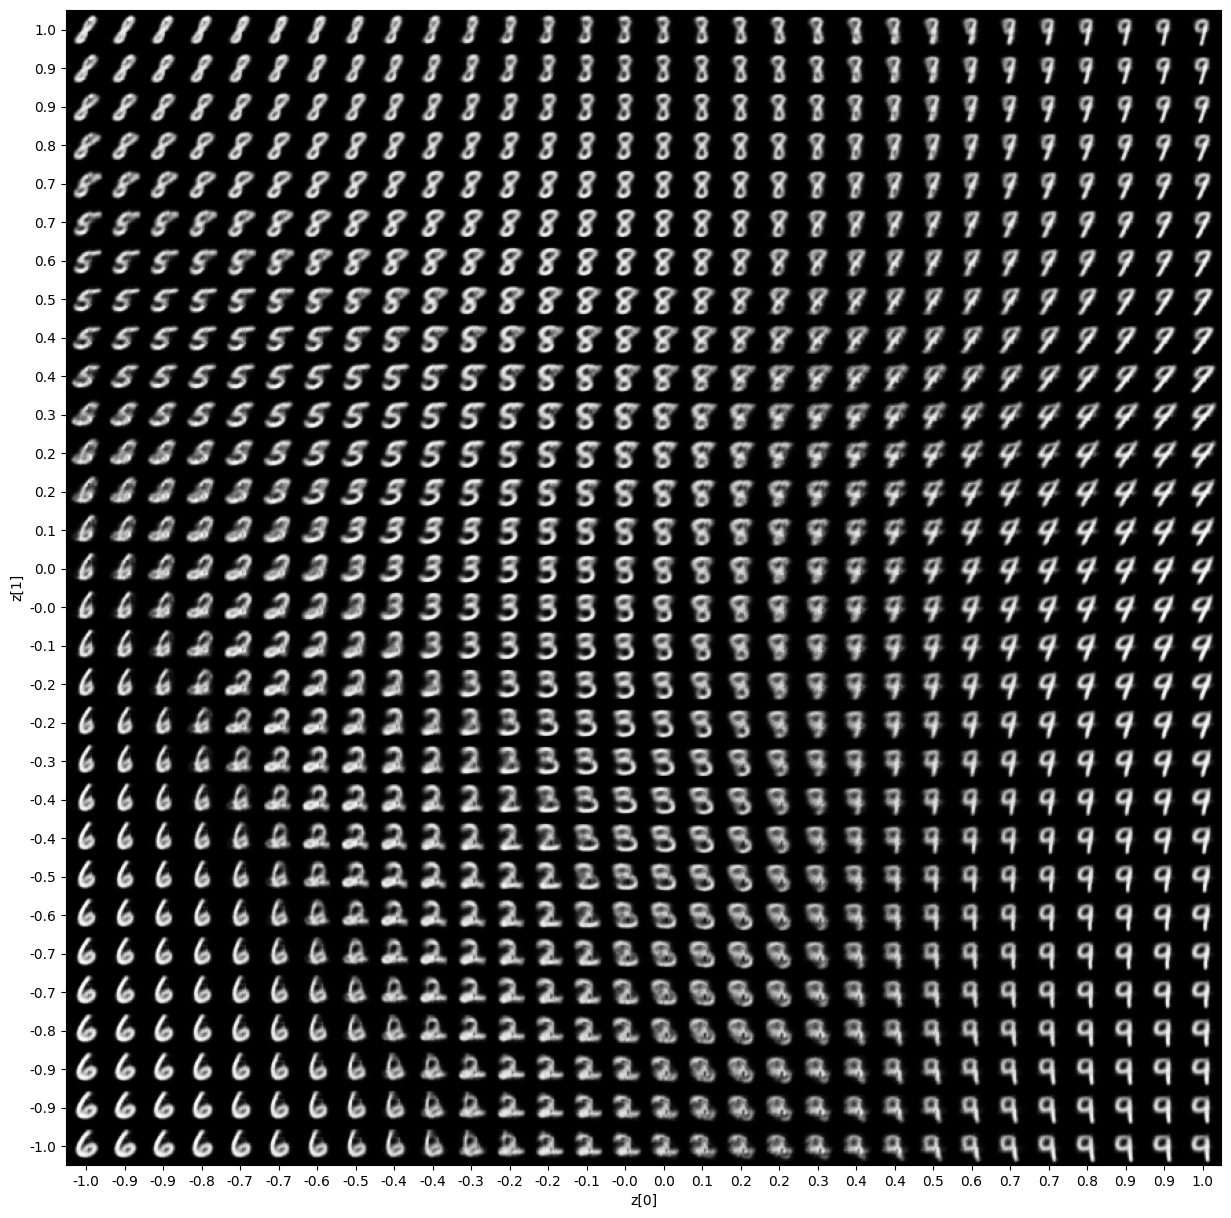

1875/1875 [==============================] - 12s 7ms/step


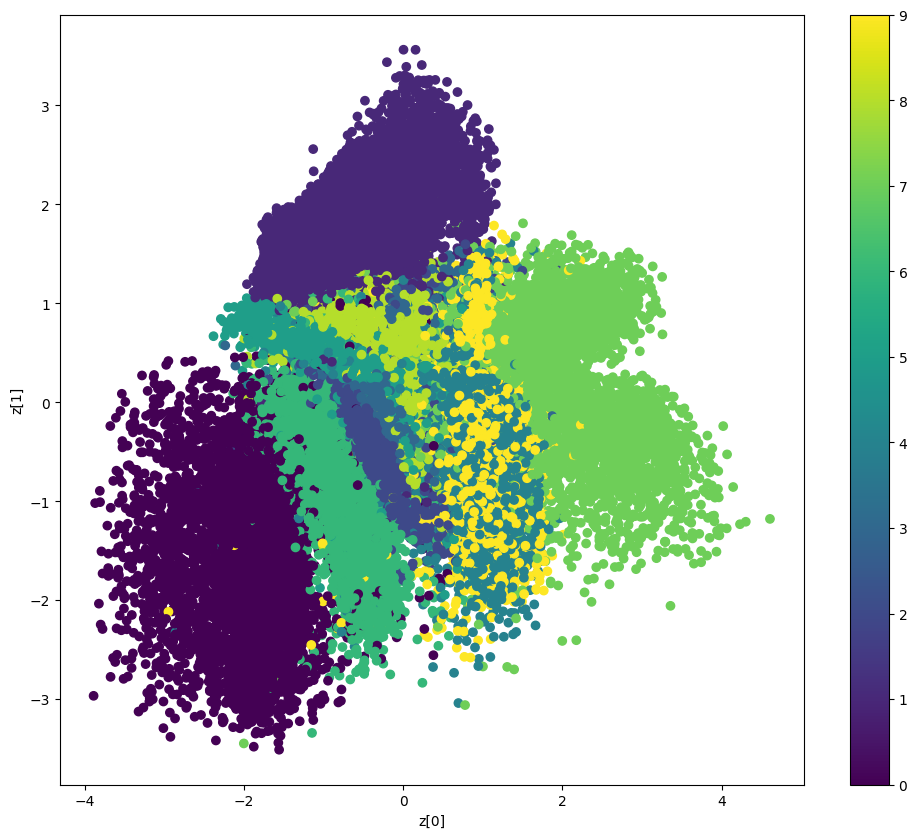

In [531]:
"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)